### Read in image in bmp format

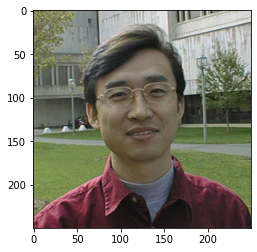

In [ ]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('IDPicture.bmp') 
img = img[:, :, :3]
  
# Output Images 
plt.imshow(img) 

## Display the images of the three color components

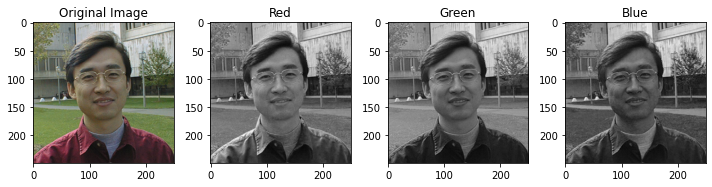

In [ ]:
import numpy as np
red_band = np.zeros(img.shape, dtype = "uint8")
red_band = img[:, :, 0]

green_band = np.zeros(img.shape, dtype = "uint8")
green_band = img[:, :, 1]

blue_band = np.zeros(img.shape, dtype = "uint8")
blue_band = img[:, :, 2]

fig, ax = plt.subplots(1,4, figsize = (10, 15))
ax[0].imshow(img)
ax[0].title.set_text('Original Image')
ax[1].imshow(red_band, cmap = plt.get_cmap(name = 'gray'))
ax[1].title.set_text('Red')
ax[2].imshow(green_band, cmap = plt.get_cmap(name = 'gray'))
ax[2].title.set_text('Green')
ax[3].imshow(blue_band, cmap = plt.get_cmap(name = 'gray'))
ax[3].title.set_text('Blue')
fig.tight_layout()


##Intensity Image

### NTSC standrad Intensity Image

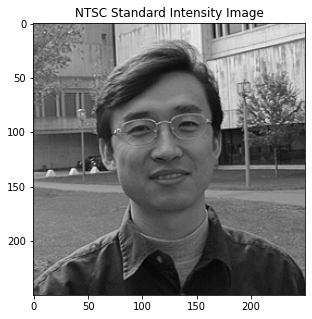

In [ ]:
I_1 = np.dot(img[... , :3] , [0.299 , 0.587, 0.114]) 

plt.figure( figsize = (5,5))
plt.imshow(I_1, cmap = plt.get_cmap(name = 'gray'))
plt.title('NTSC Standard Intensity Image')
plt.show()


### Average RGB value

Text(0.5, 1.0, 'Average RGB Intensity Image')

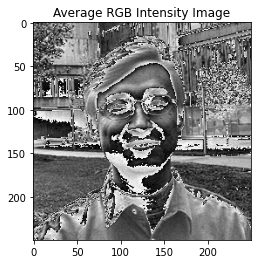

In [ ]:
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

I_2 = (R + G + B)/3

plt.imshow(I_2, cmap = plt.get_cmap(name = 'gray'))
plt.title('Average RGB Intensity Image')

## Quantize gray-sclae image

In [ ]:
def quantize_img(img, K):
  new_img = np.zeros(img.shape, dtype = "uint8")
  max_pixel = img.max()
  min_pixel = img.min()
  diff = max_pixel - min_pixel
  intervals = diff/K
  for i in range(len(img)):
    for j in range(len(img[i])):
      new_img[i][j] = img[i][j]//intervals * intervals
  return new_img


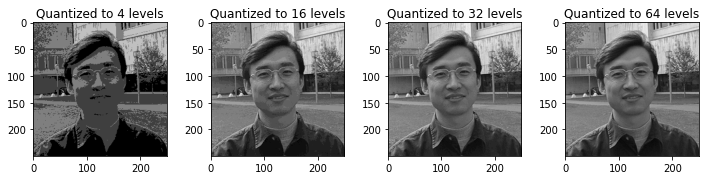

In [ ]:
Q_4 = quantize_img(I_1, 4)
Q_16 = quantize_img(I_1, 16)
Q_32 = quantize_img(I_1, 32)
Q_64 = quantize_img(I_1, 64)

fig, ax = plt.subplots(1, 4, figsize = (10, 20))
ax[0].imshow(Q_4, cmap = plt.get_cmap(name = 'gray'))
ax[0].title.set_text('Quantized to 4 levels')
ax[1].imshow(Q_16, cmap = plt.get_cmap(name = 'gray'))
ax[1].title.set_text('Quantized to 16 levels')
ax[2].imshow(Q_32, cmap = plt.get_cmap(name = 'gray'))
ax[2].title.set_text('Quantized to 32 levels')
ax[3].imshow(Q_64, cmap = plt.get_cmap(name = 'gray'))
ax[3].title.set_text('Quantized to 64 levels')

fig.tight_layout()


## Quantize color image 

In [ ]:
def quantize_color_img(img, K):
  new_img = np.zeros(img.shape, dtype = "uint8")
  for i in range(3):
    band = img[:, :, i]
    new_img_band = new_img[:, :, i]
    max_pixel = band.max()
    min_pixel = band.min()
    diff = max_pixel - min_pixel
    intervals = diff/K
    for k in range(len(band)):
      for j in range(len(band[i])):
        new_img_band[k][j] = band[k][j]//intervals * intervals
  return new_img


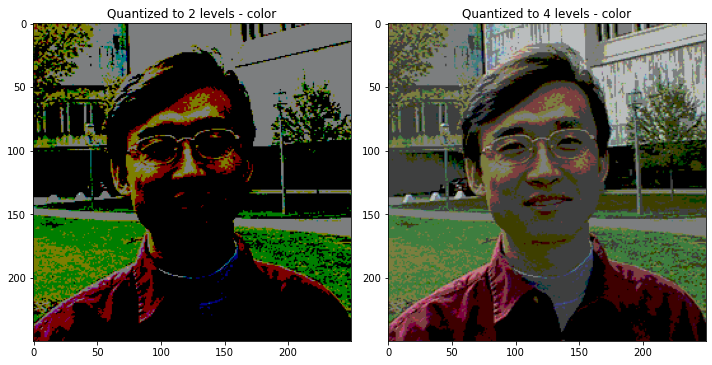

In [ ]:
Q_2_colored = quantize_color_img(img, 2)
Q_4_colored = quantize_color_img(img, 4)

fig, ax = plt.subplots(1,2,figsize = (10, 10))
ax[0].imshow(Q_2_colored)
ax[0].title.set_text('Quantized to 2 levels - color')
ax[1].imshow(Q_4_colored)
ax[1].title.set_text('Quantized to 4 levels - color')
fig.tight_layout()

## Logarithmic Quantization

Text(0.5, 1.0, 'Logarithmic quantization - color')

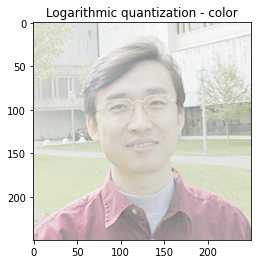

In [ ]:
C = 255/np.log(255+1)

def quantize_log_img(img, C):
  new_img = np.zeros(img.shape, dtype = "uint8")
  for i in range(3):
    band = img[:, :, i]
    new_img_band = new_img[:, :, i]
    for k in range(len(band)):
      for j in range(len(band[i])):
        new_img_band[k][j] = C * np.log(band[k][j] +1)
  return new_img

log_img = quantize_log_img(img, C)
plt.imshow(log_img)
plt.title('Logarithmic quantization - color')

## YUV and HSI images


### YUV image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


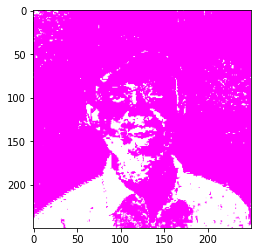

In [ ]:
def rgb2yuv(rgb_img):
     
    multiplier = np.array([[0.29900, 0.587, 0.114],
                 [-0.14713, -0.28886, 0.436],
                 [0.615, -0.51499, -0.10001]])
     
    yuv = np.dot(rgb_img,multiplier)
    return yuv

YUV = rgb2yuv(img)
plt.imshow(YUV)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


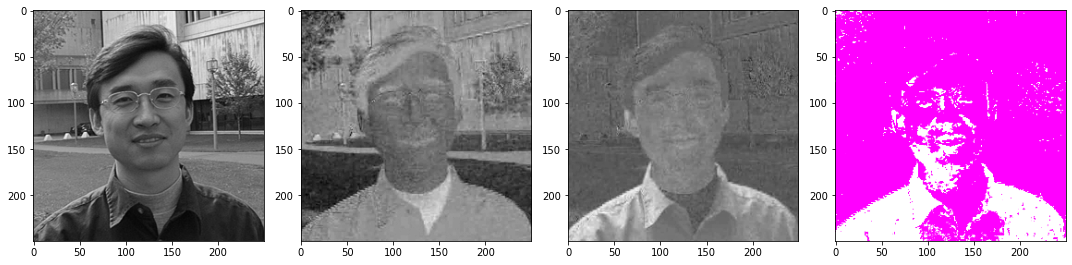

In [ ]:


Y = np.dot(img[... , :3], [0.29900, 0.587, 0.114])

U = np.dot(img[..., :3], [-0.14713, -0.28886, 0.436])

V = np.dot(img[..., :3], [0.615, -0.51499, -0.10001])

fig, ax = plt.subplots(1, 4, figsize = (15, 20))
ax[0].imshow(Y, cmap = plt.get_cmap(name = 'gray'))
ax[1].imshow(U, cmap = plt.get_cmap(name = 'gray'))
ax[2].imshow(V, cmap = plt.get_cmap(name = 'gray'))
ax[3].imshow(YUV)

fig.tight_layout()

### HSI Image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


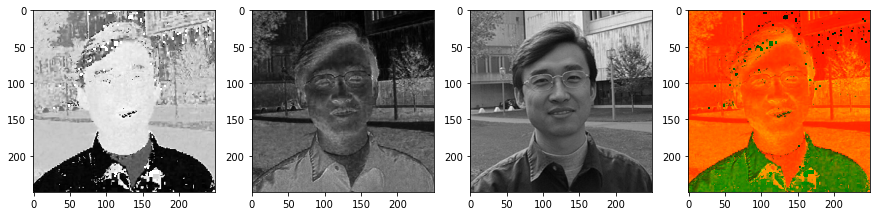

In [ ]:
import cv2
import math

#Split channels
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

#Intensity
Intensity = (red + green + blue)/ 3

#Saturation
minimum = np.minimum(np.minimum(red, green), blue)
Saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)

#Calculate Hue
def calculate_hue(red, blue, green):
  hue = np.copy(red)

  for i in range(0, blue.shape[0]):
      for j in range(0, blue.shape[1]):
          hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
                      math.sqrt((red[i][j] - green[i][j])**2 +
                              ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
          hue[i][j] = math.acos(hue[i][j])

          if blue[i][j] <= green[i][j]:
              hue[i][j] = hue[i][j]
          else:
              hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]

  
  return hue
Hue = calculate_hue(red, green, blue)

#Merge channels into picture and return image
hsi = cv2.merge((Hue, Saturation, Intensity))


fig, ax = plt.subplots(1, 4, figsize = (15, 20))
ax[0].imshow(Hue, cmap = plt.get_cmap(name = 'gray'))
ax[1].imshow(Saturation, cmap = plt.get_cmap(name = 'gray'))
ax[2].imshow(Intensity, cmap = plt.get_cmap(name = 'gray'))
ax[3].imshow(hsi, cmap = plt.get_cmap(name = 'gray'))